In [292]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.interpolate as si
import scipy.constants as sc
import scipy.optimize as so

N=200000

x=st.norm.rvs(loc=0, scale=.05, size=N)
px=st.norm.rvs(loc=0, scale=0.3, size=N)

x_low_d=st.norm.rvs(loc=0, scale=.05, size=int(N/400))
px_low_d=st.norm.rvs(loc=0, scale=0.3, size=int(N/400))



In [318]:
import matplotlib as mpl

key="half_width_g"

if key == "full_width_g":
    w=4.7
    h=w/1.618

if key == "insert":
    w=4.7/2*(30/41)
#    h=w/1.618
    h=2*30/41

if key == "half_width_g":
    w=4.7/2
#    h=w/1.618
    h=2
if key == "full_width_10":
    w=4.7
    h=10

mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'


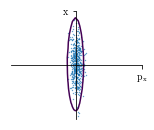

In [326]:
fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks([1])
ax.xaxis.set_ticklabels(['$p_x$'])

ax.yaxis.set_ticks([1])
ax.yaxis.set_ticklabels(['$x$'])

plt.scatter(x_low_d,px_low_d,s=0.1,alpha=1)
plt.xlim([-1,1])
plt.ylim([-1,1])

density,xbin,ybin=np.histogram2d(x,px,bins=20)

dx=(xbin[1]-xbin[0])
dy=(ybin[1]-ybin[0])

xbin=xbin[:-1]
ybin=ybin[:-1]+dy/2

Xbin,Ybin=np.meshgrid(xbin,ybin)
plt.contour(Xbin,Ybin,density,465/2)
plt.savefig('emittance_phase_space.pdf')

In [327]:
x_ld_non_lin=x_low_d+0.4*np.sin(2.5*px_low_d)
x_non_lin=x+0.4*np.sin(2.5*px)

density_s,xbin_s,ybin_s=np.histogram2d(x_non_lin,px,bins=60)

dx_s=(xbin_s[1]-xbin_s[0])
dy_s=(ybin_s[1]-ybin_s[0])

xbin_s=xbin_s[:-1]
ybin_s=ybin_s[:-1]

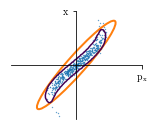

In [328]:
from matplotlib import patches

fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks([1])
ax.xaxis.set_ticklabels(['$p_x$'])

ax.yaxis.set_ticks([1])
ax.yaxis.set_ticklabels(['$x$'])

# plt.scatter(x_ld_non_lin,px_low_d,s=0.9,alpha=1)
plt.scatter(x_ld_non_lin,px_low_d,s=0.1,alpha=1)
plt.xlim([-1,1])
plt.ylim([-1,1])

Xbin_s,Ybin_s=np.meshgrid(xbin_s,ybin_s)
plt.contour(Xbin_s,Ybin_s,density_s.T,150.1)
# plt.imshow(density_s)


e2 = patches.Ellipse((0, 0),.3, 2,
                     angle=-36, linewidth=2, fill=False, color='C1')


ax.add_patch(e2)


plt.savefig('emittance_phase_space_s.pdf')